In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_excel('./Istanbul_StockMarket_09-11.xlsx', header=2)
data['date'] = pd.to_datetime(data.date)
feature_name = 'USD BASED ISE'
data = data[['date', feature_name]]
data.set_index('date');

Analyze min and max values of Istanbul Stock Market indexes using block maxima method (don’t forget to reconstruct all gaps)

Analyze min and max values of Istanbul Stock Market indexes using block POT method (don’t forget to prove chosen threshold)

Fit appropriate distribution for extreme values (GEV, GPD)

Find curves for VaR and ES criteria for various quantiles (0.9 – 0.999)

In [4]:
months = [g for n, g in data.set_index('date').groupby(pd.TimeGrouper('M'))]

D:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


In [5]:
ts = data[feature_name]

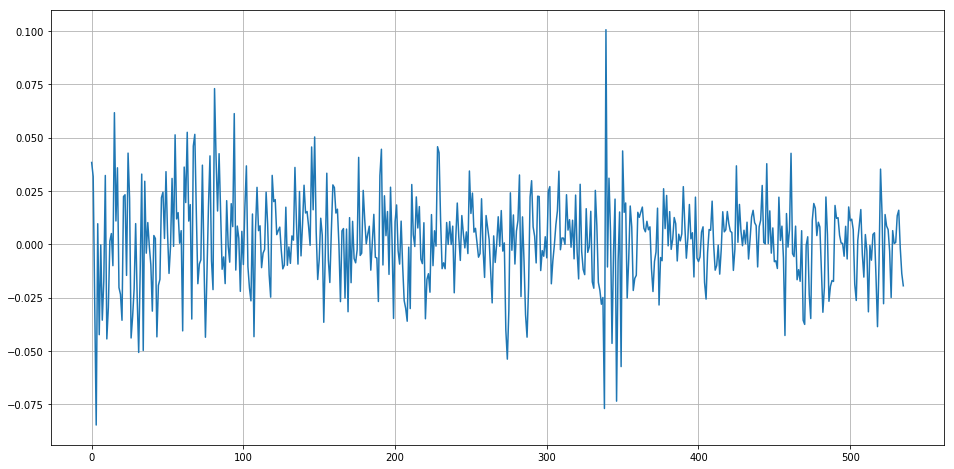

In [6]:
plt.figure(figsize=(16,8))
ts.plot()
plt.grid(True)

In [7]:
step = 30

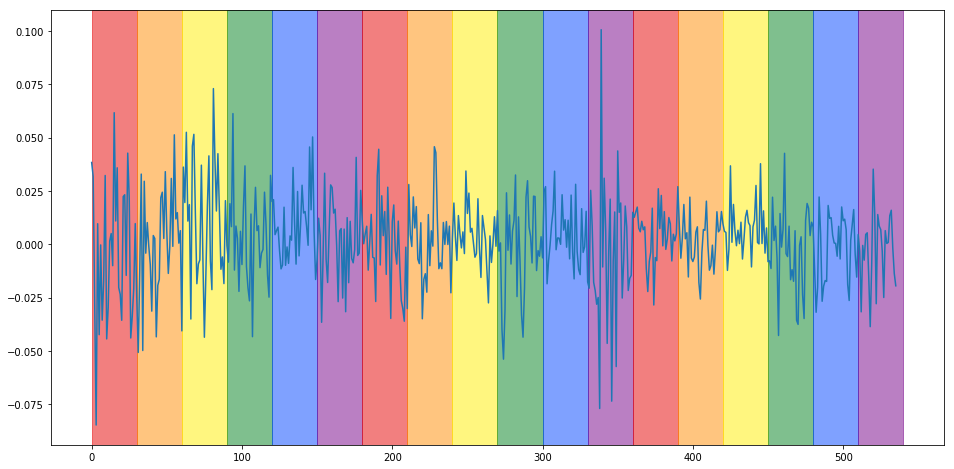

In [8]:
plt.figure(figsize=(16,8))
ts.plot()
for i in [1, 2, 3]:
    plt.axvspan(0+(i-1)*step*6, step+(i-1)*step*6, color='#E70000', alpha=0.5)
    plt.axvspan(step*1+(i-1)*step*6, step*2+(i-1)*step*6, color='#FF8C00', alpha=0.5)
    plt.axvspan(step*2+(i-1)*step*6, step*3+(i-1)*step*6, color='#FFEF00', alpha=0.5)
    plt.axvspan(step*3+(i-1)*step*6, step*4+(i-1)*step*6, color='#00811F', alpha=0.5)
    plt.axvspan(step*4+(i-1)*step*6, step*5+(i-1)*step*6, color='#0044FF', alpha=0.5)
    plt.axvspan(step*5+(i-1)*step*6, step*6+(i-1)*step*6, color='#760089', alpha=0.5)

Block maxima method

In [9]:
print("Max values:")
block_max_distribution = []
for i in range(0, ts.size, step):
    block_max_distribution.append(ts[i:i+step].max())
print(block_max_distribution)

Max values:
[0.061708176000000003, 0.051330657000000002, 0.073005405999999995, 0.061284869999999998, 0.050339385, 0.040760841999999999, 0.044574338999999998, 0.045764354, 0.034372173999999998, 0.032506145, 0.034281823000000003, 0.100620694, 0.026056593999999999, 0.027040453999999998, 0.037795035999999997, 0.042670291999999999, 0.022188263, 0.035256817000000003]


In [10]:
print("Min values:")
block_min_distribution = []
for i in range(0, ts.size, step):
    block_min_distribution.append(ts[i:i+step].min())
print(block_min_distribution)

Min values:
[-0.084715901999999996, -0.050687494999999999, -0.043561684000000003, -0.043297073999999998, -0.016477754000000001, -0.036549775999999999, -0.036051349000000003, -0.034907070999999998, -0.027452668, -0.053826568999999998, -0.018503617, -0.076967444999999995, -0.028443062000000002, -0.025658664000000001, -0.012223346, -0.042735495999999998, -0.031852930000000002, -0.038598965999999998]


In [11]:
block_mm = {'block_max': block_max_distribution, 'block_min': block_min_distribution}
pd.DataFrame(data=block_mm).to_csv('./block_mm.csv')

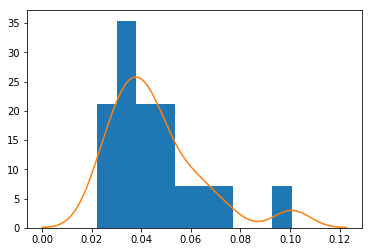

In [18]:
import seaborn as sns
plt.hist(block_max_distribution, normed=True);
# sns.distplot(block_max_distribution, kde_kws={"color": "k", "lw": 1, "label": "KDE", "bw": "3"});
sns.kdeplot(block_max_distribution)

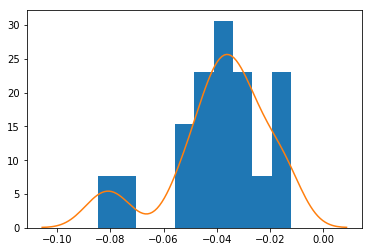

In [20]:
plt.hist(block_min_distribution, normed=True);
sns.kdeplot(block_min_distribution)

In [140]:
threshold = 0.04

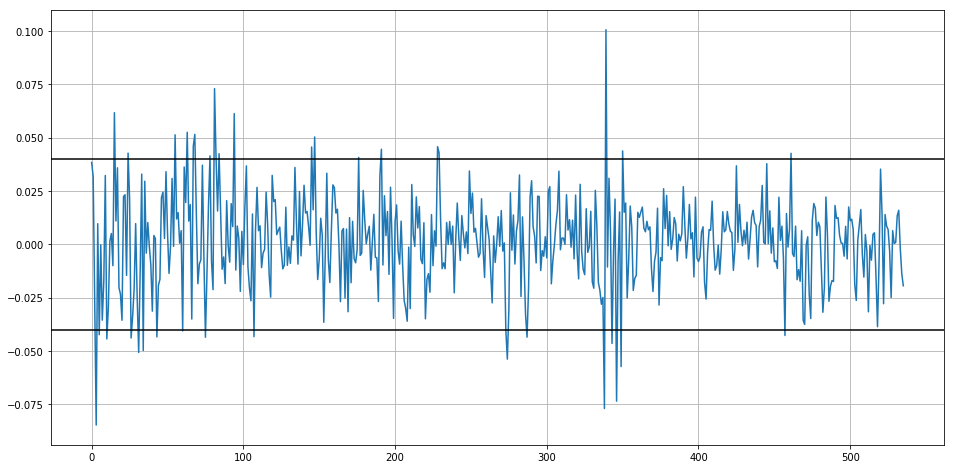

In [141]:
plt.figure(figsize=(16,8))
ts.plot()
plt.axhline(y=threshold, color='black', linestyle='-')
plt.axhline(y=-threshold, color='black', linestyle='-')
plt.grid(True)

In [142]:
print("Peak over Threshold (POT)")
POT_max = [elem for elem in ts if elem > threshold]
POT_min = [elem for elem in ts if elem < -threshold]

Peak over Threshold (POT)


In [143]:
len(POT_min), len(POT_max)

(18, 20)

In [144]:
# block_max_distribution
# block_min_distribution

In [145]:
import scipy.stats as scs

In [159]:
t = np.linspace(ts.min(), ts.max(), 100)

GEV (часть в r_main)

In [253]:
x_min, c_min, loc_min = scs.genextreme.fit(np.array(sorted(POT_min)), loc=0.1, scale=1)

D:\Programs\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2175: RuntimeWarning: invalid value encountered in subtract
  -pex2+logpex2-logex2)


In [254]:
x_min, c_min, loc_min

(1.1781271000481299, -0.051614054892782674, 0.013559778613160921)

In [255]:
mmin = scs.genextreme.pdf(t, x_min, c_min, loc_min)

In [362]:
x_max, c_max, loc_max = scs.genextreme.fit(np.array(sorted(block_max_distribution)), loc=0.1, scale=1)

In [257]:
x_max, c_max, loc_max

(-0.7475702807715795, 0.043832986818581096, 0.0039892636629121174)

In [258]:
mmax = scs.genextreme.pdf(t, x_max, c_max, loc_max)

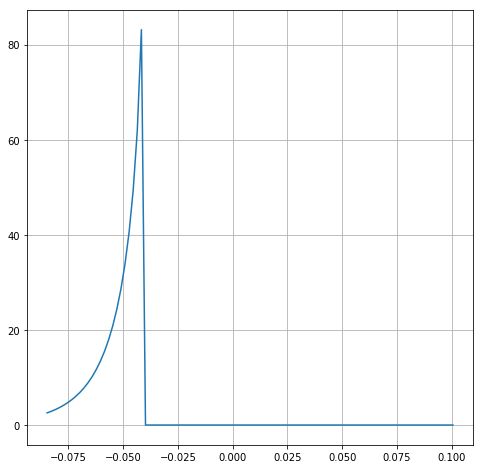

In [259]:
plt.figure(figsize=(8,8))
plt.plot(t, mmin, label='Min')
plt.grid()
plt.show()

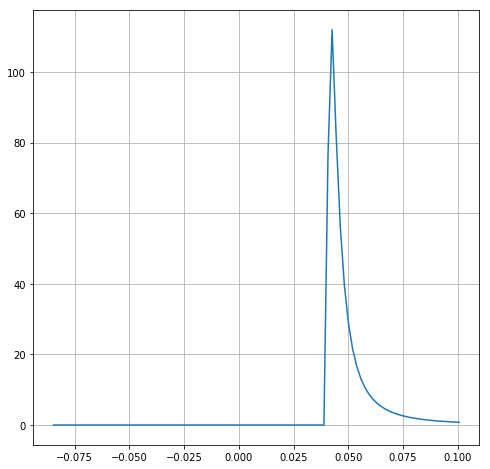

In [260]:
plt.figure(figsize=(8,8))
plt.plot(t, mmax, label='Max')
plt.grid()
plt.show()

GPD

In [389]:
x_max, c_max, loc_max = scs.genpareto.fit(np.array(sorted(block_max_distribution)), loc=0, scale=1)

In [262]:
x_min, c_min, loc_min = scs.genpareto.fit(np.array(sorted(POT_min)), loc=0, scale=1)

In [367]:
plt.figure(figsize=(16,8))
plt.plot(t, scs.genpareto.pdf(t, x_max, c_max, loc_max))
plt.plot(t, scs.genpareto.pdf(-t, x_min, c_min, loc_min))
plt.legend()
plt.grid()
plt.show()

VaR and ES (часть в r_main)

In [348]:
def VaR(params, alpha, mode='min'):
    if mode=='min':
        return params[2]/(params[0])*(1-(data.shape[0]/len(pots[mode])*(1-alpha))**(-params[0]))
    if mode=='max':
        return params[2]/(params[0])*(1-(data.shape[0]/len(pots[mode])*(1-alpha))**(params[0]))

In [349]:
qs = np.linspace(0.9, 0.999, 100)

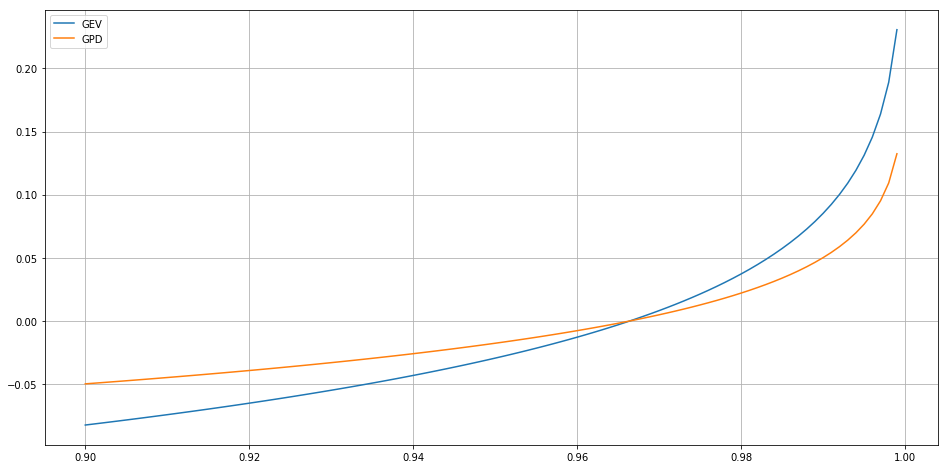

In [378]:
ap,ax=plt.subplots(figsize=(16,8))
plt.plot(qs, [VaR(q, mode='max') for q in qs], label='GEV')
plt.plot(qs, [VaR(q) for q in qs], label='GPD')
plt.legend()
plt.grid()
plt.show()

In [368]:
def ES(alpha, mode='min'):
    return (VaR(alpha, mode=mode)+(fitted_parameters[mode][2]-fitted_parameters[mode][0]*u[mode]))/(1-fitted_parameters[mode][0])

In [1]:
ap,ax=plt.subplots(figsize=(10,8))
ax.set(xlabel='Quantile')
plt.plot(qs, [ES(q, mode='min') for q in qs])
plt.plot(qs, [VaR(q) for q in qs])
plt.legend()
plt.grid()
plt.show()